<a href="https://colab.research.google.com/github/octagomez/clasificador_ropa_ML_minist_3/blob/ML_CLASIFICADOR_ENCENDEDORES_convolutional_neural_network/ML_RED_convolucionales_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISION DIGITAL - REDES CONVOLUCIONALES** 
**REQUERIMIENTO**
- Se necesita crear un modelo de clasificacion por imagenes que clasifique en 3(Tres) marcas de encendedor. Cliper, Descartable, Bic. El modelo debera estar montado y clasificar atravez de una camara en streaming, es decir que la camara al captar con su lente alguno de estos 3 encendedores debe clasificar en CLIPER, DESCARTABLE, BIC segun corresponda.

**PASOS A SEGUIR:**

- **Procesamiento de imagenes**
  - Se deben tomar fotografias con la misma camara con la que se realizara la puesta en produccion, de cada tipo de encendedor minimo 100 fotos cada uno.
  - Convertir el set de datos a un array de numpy.
  - Agregar las etiquetas de las imagenes al array.
  - Guardar Set de datos.
  - Preparar el set de datos para ser procesado (normalizacionde imagenes).
- **Modelo**
  - Split del set en Tain y Test.
  - Entrenar el modelo.
  - Realizar Test del modelo.
  - Evaluar metricas.
  - Ajuste del modelo obtimizado.
- **Deployt**
  - Implementar el modelo para que pueda ser utilizado
  Example: https://www.kdnuggets.com/2022/02/deploying-streamlit-webapp-heroku-dagshub.html

**Si alcanza el tiempo probar mas de un modelo y comparar resultados**




In [ ]:
# DESCOMPRIMO EL ZIP CON LAS IMAGENES
import zipfile
import io
data =zipfile.ZipFile('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER/encendedor_cliper.zip.zip','r')
data.extractall()

In [ ]:
#DEFINO EL PAD DE LOS ARCHIVOS
#pad /content/encendedor_cliper
pad = '/content/encendedor_cliper'

In [ ]:
# 
import cv2 #se utiliza para imagenes
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_cliper = '/content/encendedor_cliper'
cliper_training = []
img_size = 80
count=0
for img in os.listdir(ruta_cliper):
  print(" IMAGEN POSICION :", count, " - ", img)
  img = cv2.imread(os.path.join(ruta_cliper,img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  cliper_training.append([img_gray_resize])
  count = count + 1

print(len(cliper_training))
print(cliper_training)

 IMAGEN POSICION : 0  -  IMG_20220901_165408.jpg
 IMAGEN POSICION : 1  -  IMG_20220901_170100.jpg
 IMAGEN POSICION : 2  -  IMG_20220901_165956.jpg
 IMAGEN POSICION : 3  -  IMG_20220901_170153.jpg
 IMAGEN POSICION : 4  -  IMG_20220901_170036.jpg
 IMAGEN POSICION : 5  -  IMG_20220901_164912.jpg
 IMAGEN POSICION : 6  -  IMG_20220901_164700.jpg
 IMAGEN POSICION : 7  -  IMG_20220901_164908.jpg
 IMAGEN POSICION : 8  -  IMG_20220901_165336.jpg
 IMAGEN POSICION : 9  -  IMG_20220901_165406.jpg
 IMAGEN POSICION : 10  -  IMG_20220901_165917.jpg
 IMAGEN POSICION : 11  -  IMG_20220901_164900.jpg
 IMAGEN POSICION : 12  -  IMG_20220901_164655.jpg
 IMAGEN POSICION : 13  -  IMG_20220901_170056.jpg
 IMAGEN POSICION : 14  -  IMG_20220901_170011.jpg
 IMAGEN POSICION : 15  -  IMG_20220901_165425.jpg
 IMAGEN POSICION : 16  -  IMG_20220901_164958.jpg
 IMAGEN POSICION : 17  -  IMG_20220901_165431.jpg
 IMAGEN POSICION : 18  -  IMG_20220901_170029.jpg
 IMAGEN POSICION : 19  -  IMG_20220901_165416.jpg
 IMAGEN PO

error: ignored

In [ ]:
# elimino los archivos que fallan al procesar xq no son archivos de imagenes
!pwd
%cd /content/encendedor_cliper

/content
/content/encendedor_cliper


In [ ]:
!rm .ipynb_checkpoints

rm: cannot remove '.ipynb_checkpoints': Is a directory


In [ ]:
print(len(cliper_training))
print(cliper_training)

99
[[array([[ 14,  28,  23, ..., 138, 145, 128],
       [ 15,  25, 112, ..., 154, 158, 136],
       [ 19,  14,  12, ..., 163, 158, 171],
       ...,
       [121, 129, 128, ...,  31,  45,  45],
       [130, 126, 119, ...,  22,  24,  32],
       [ 78,  88,  85, ...,  77,  20,  29]], dtype=uint8)], [array([[71, 52, 57, ..., 30, 32, 24],
       [56, 58, 45, ..., 26, 15,  7],
       [49, 53, 52, ..., 26, 19, 15],
       ...,
       [ 7,  6,  6, ..., 15, 25, 14],
       [ 6,  7,  6, ..., 10, 12, 20],
       [ 4,  6,  5, ..., 15, 10, 15]], dtype=uint8)], [array([[  5,   6,  17, ...,  97,  96,  96],
       [ 23,   2,   2, ...,  78,  71,  81],
       [111,  21,   0, ...,  75,  74,  72],
       ...,
       [ 46,  77,  65, ...,  51,  54,  56],
       [  7,   7,   6, ...,  44,  63,  54],
       [ 10,  10,  25, ...,   9,  10,  11]], dtype=uint8)], [array([[107, 108, 117, ..., 252, 252, 252],
       [ 19,  20,  30, ..., 249, 247, 212],
       [ 92,  65,  46, ..., 252, 248, 244],
       ...,
       [

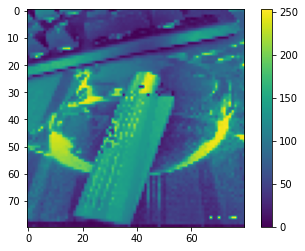

In [ ]:
# GRAFICAR

plt.figure()
plt.imshow(np.squeeze(cliper_training[2]))
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame(cliper_training)
df.to_csv('set_sin_etiquetar_cliper.csv')


In [ ]:
# Guardo el set de datos de imagenes SIN etiquetas
# from tempfile import TemporaryFile
# set_sin_etiquetar_cliper = TemporaryFile()

cliper_training.save('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER/set_sin_etiquetar_cliper.h5')

# save to csv file
cliper_training.tofile('set_sin_etiquetar_cliper.dat')
savetxt('/content/drive/MyDrive/IA_TP/VISION_ARTIFICIAL/ENCENDEDOR_CLIPER/set_sin_etiquetar_cliper.h5', data, delimiter=';')



AttributeError: ignored